# Physics 77, Lecture 2 (Week 3): Control Structures

Topic coverage:
* Review of last two weeks
* Conditionals and If/Elif/Else statements
* Local/Global variables
* For and While Loops
* List comprehensions (if not covered in Lecture 1)
    - also list comprehensions with conditional filters?
* Functions

Many algorithms require execution of a different set of instructions depending on some conditions, repetitive (iterative) execution, etc. These are done by special control statements.

### Conditionals

Implement conditions. Beware ! Indentation is important in Python (awful feature of the language if you ask me)

In [2]:
x = input('Enter numerical value: ')
if x < 0 :
    x = -x   # only executed for negative numbers
    print 'This was a negative value'
print x    # always executed

Enter numerical value: -9
This was a negative value
9


Sometimes you may want to do two different things:

In [4]:
sum = 10
x = input('Enter numerical value: ')
if x < 0 :
    sum = sum - x
else :
    sum += x
print sum

Enter numerical value: -10
20


And sometimes you may need to have several branches

In [8]:
value = 0
x = input('Enter numerical value: ')
if x > 10 :
    value = -1
elif x < -1:
    value = 0
elif x > 7:
    value = 6
else:
    value = 1
    
print value

Enter numerical value: 8
6


### Loops

While loops: repeat execution while condition is valid

In [10]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    print sum
    
print sum, count

10
20
30
40
50
60
70
80
90
100
100 10


Special keywords: break, continue, pass, else

In [1]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if sum >= 60:
        break
    
print sum, count

60 6


In [11]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if sum > 40 :
        continue
    print sum
    
print sum, count

10
20
30
40
100 10


In [16]:
sum = 0
count = 0
while sum < 100:
    sum += 10
    count += 1
    if sum >= 60:
        break
else:                                     # beware of indentation !!!
        print "Finished without break"
    
    
print sum, count

60 6


for loop is more conventional. This is similar to for() loop in C or other languages

An equivalent syntax in C would be for (i=0;i<10;i++) {}

In [26]:
list = range(0,10)
print list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [27]:
for i in list:    # loop from 0 to 10, not including 10, with step = 1
    print i

0
1
2
3
4
5
6
7
8
9


In [21]:
for i in range(0,10,2):   # loop from 0 to 10, not including 10, with step = 2
    print i

0
2
4
6
8


In [32]:
list = (1,2,3,4,7,111.)   # iterate over elements of the tuple && not allowed to append to a tuple
# list.append(12)          # what happens here ? 
for x in list:
    print x**2

1
4
9
16
49
12321.0


In [33]:
lastnames = {}                        # create a dictionary
lastnames['Sally'] = 'Smith'
lastnames['Johnny'] = 'Baker'
lastnames['Billy'] = 'Jones'
list = lastnames.keys()
list.sort()
print list
for key in list:          # iterate over elements of the dictionary
    print key, lastnames[key]


['Billy', 'Johnny', 'Sally']
Billy Jones
Johnny Baker
Sally Smith


### Functions

A function is a self-contained named piece of code that can be used by other parts of the code. Functions usually take arguments (parameters, variables), and return a value. Trig functions are a standard example. Most languages allow you to define your own functions. Functions can be group into a library, usually according to functionality they provide (e.g. math, complex numbers, linear algebra, plotting, etc). 

In [34]:
def factorial(n):                # definition of the function
    value = 1
    for i in range(2,n+1):       # loop
        value *= i               # increment factorial 
        
    return value                 # return value

print 'factorial(10)=',factorial(10)
for i in range(1,5):
    print 'factorial(%d)=%02d' % (i,factorial(i))


factorial(10)= 3628800
factorial(1)=01
factorial(2)=02
factorial(3)=06
factorial(4)=24


Here is a more elegant way to implement the function (recursive). It also has basic error handling

In [36]:
import numpy as np
def factRecursive(n):
    ' ' 'computes n! input integer output integer ' ' '
    if type(n)!=int:                     # factorials defined only for integers
        return np.nan                    # return Not-a-number
    if n > 1:
        return n*factRecursive(n-1)
    elif n >= 0:
        return 1
    else:
        return -np.inf                  # return negative infinity
    
print factRecursive(10)
print factRecursive(-1)
print factRecursive(1.1)
        

3628800
-inf
nan


### Local vs Global variables

Typically, variables inside the scope of a function (or class member) are only visible inside that function. If you happen to use the same variable outside and inside a function (global vs local scope), a new variable is usually created inside the function, which will "shadow" (make it inaccessible) the global variable. There are exceptions and special cases for this, and the behavior often depends on the programming language, environment, etc. It is BAD PRACTICE to reuse variable names in different scopes. It is also usually BAD PRACTICE for a function to modify global variables (this causes unexpected side effects). It is a good practice is to declare your intentions (in documentation, and also by declaring variables global). The best practice is not to rely on globals if you can (global variables are an anachronism from the days of Fortran and common blocks, they make things efficient but bug-prone)

In [2]:
x = 5
def giveMeY():
    global x                    # pull this from global scope
    print x
    y = 10
    x = 7
    print 'x=',x,'y=',y
    return y

print 'x before function:',x
giveMeY()
print 'x after function:',x


x before function: 5
5
x= 7 y= 10
x after function: 7


In [41]:
x = 5
def test():
    y = 10
    x = 7                   # assignment operator creates a local copy with the same name ! Beware !!!
    print 'x inside function:',x
    return

print 'x before function:',x
test()
print 'x after function:',x


x before function: 5
x inside function: 7
x after function: 5


Functions can be passed into other functions, stored in lists or tuples. This can produce some neat code

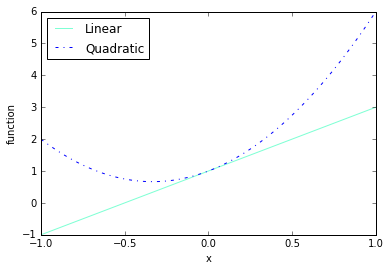

In [9]:
def lin(x):
    ''' compute polynomial of first degree'''
    global p0,p1             # didn't I say this was a bad idea ?, Using global will decrease amount of parameters
    return p0+p1*x

def sq(x):
    global p0, p1, p2        
    return p0+p1*x+p2*x*x    # why didn't I write x**2 ? efficiency

#define global parameters
p0 = 1
p1 = 2
p2 = 3

# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# produce a plot
x = np.linspace(-1,1,100)
plt.plot(x,lin(x),'-', color = "aquamarine")
plt.plot(x,sq(x),'b-.')
plt.xlabel('x')
plt.ylabel('function')
plt.legend(['Linear','Quadratic'],loc=2)
plt.show()

In [ ]:
#to copy a list 
import copy
def sortedlist(inputlist):
    #myList = copy(inputlist)
    myList = sorted(inputlist, reverse=True)
    #takes the original list makes a copy then sorts it

In [ ]:
#list cannot do linear algebra/ np.array
#from pylab import * 
#np.arange(-pi, pi, pi/100) array of values/can do linear algebra on them
